# STA 141B Assignment 5

Due __Mar 4, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice accessing and analyzing data in a database.

__For full credit, do most of your work in SQL.__ Subsetting, sorting, grouping, aggregation, and merging can all be done in SQL. It is okay to use Python code for parts of your analysis that are difficult or impossible to do in SQL, such as creating visualizations or computing statistics (other than the mean).

## Lahman's Baseball Database

In this assignment, you'll use SQL queries and __pandas__ to explore data in [Lahman's Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/), which contains "complete batting and pitching statistics from 1871 to 2018, plus fielding statistics, standings, team stats, managerial records, post-season data, and more."

You can download the database in SQLite format [HERE](https://anson.ucdavis.edu/~nulle/baseball.sqlite).

Documentation for the database, including a description of all tables, is in the `README.md` file included in this repository.

__Exercise 1.1.__ 

1. From 2006 to 2016, which 5 teams had the highest payrolls? Payroll means the sum of the salaries for all people on the team in a given year.

2. Is there any general trend in payrolls over this time period?

3. There are at least 2 anomalies in the payrolls over this time period. What are they, and can you find information (online or elsewhere) to explain them?

4. How do the top 5 teams compare to other teams?

In [23]:
import sqlite3 as sql
import pandas as pd
import seaborn as sns

db = sql.connect("baseball.sqlite")
cur = db.execute("SELECT * FROM sqlite_master")
selection = cur.fetchall()
pd.read_sql("SELECT * FROM sqlite_master;", db)

,type,name,tbl_name,rootpage,sql
0,table,Fielding,Fielding,2,"CREATE TABLE ""Fielding"" (\n""playerID"" TEXT,\n ..."
1,index,IndexFielding,Fielding,3,CREATE INDEX IndexFielding ON Fielding (player...
2,table,CollegePlaying,CollegePlaying,2280,"CREATE TABLE ""CollegePlaying"" (\n""playerID"" TE..."
3,index,IndexCollegePlaying,CollegePlaying,2282,CREATE INDEX IndexCollegePlaying ON CollegePla...
4,table,FieldingOF,FieldingOF,2355,"CREATE TABLE ""FieldingOF"" (\n""playerID"" TEXT,\..."
5,index,IndexFieldingOF,FieldingOF,2357,CREATE INDEX IndexFieldingOF ON FieldingOF (pl...
6,table,Salaries,Salaries,2408,"CREATE TABLE ""Salaries"" (\n""yearID"" INTEGER,\n..."
7,index,IndexSalaries,Salaries,2410,CREATE INDEX IndexSalaries ON Salaries (yearID...
8,table,TeamsHalf,TeamsHalf,2520,"CREATE TABLE ""TeamsHalf"" (\n""yearID"" INTEGER,\..."
9,index,IndexTeamsHalf,TeamsHalf,11561,CREATE INDEX IndexTeamsHalf ON TeamsHalf (year...


1. From 2006 to 2016, which 5 teams had the highest payrolls? Payroll means the sum of the salaries for all people on the team in a given year.

In [27]:
pd.read_sql("SELECT * FROM Salaries;", db)
data = pd.read_sql("""SELECT teamID, yearID, SUM(salary) AS teamSalarySum 
                      FROM Salaries where yearID > 2005 AND yearID < 2017 
                      GROUP BY teamID, yearID
                      ORDER BY teamSalarySum DESC """, db)
data

,teamID,yearID,teamSalarySum
0,NYA,2013,231978886
1,LAN,2013,223362196
2,NYA,2016,222997792
3,LAN,2016,221288380
4,LAN,2014,217014600
5,LAN,2015,215792000
6,NYA,2015,212751957
7,NYA,2008,207896789
8,NYA,2010,206333389
9,NYA,2011,202275028


The top 5 teams over the time period 2006 to 2016 are, NYA, BOS, LAN, DET, PHI or New York Yankees, Boston Red Sox, Los Angeles Dodgers, Detroit Tigers and Philadelphia Phillies.

2. Is there any general trend in payrolls over this time period?

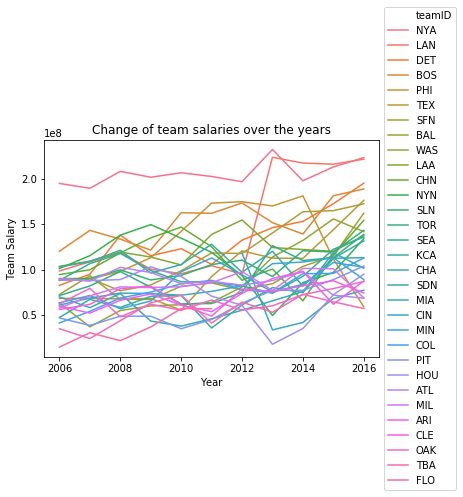

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.lineplot("yearID", "teamSalarySum", hue = "teamID", data = data)
ax.set_xlabel("Year")
ax.set_ylabel("Team Salary")
ax.set_title("Change of team salaries over the years")
ax.legend(loc = "center left", bbox_to_anchor = (1, 0.5))

The general trend is that the salaries of the teams improved over the years. 

3. There are at least 2 anomalies in the payrolls over this time period. What are they, and can you find information (online or elsewhere) to explain them?

From the graph in  part 1.1 we can see that the salary for LA Dodgers and Philadelphia Phillies had a huge increase and decrease in a short amount of time. Links to support the LA Dodger's success, https://www.dailynews.com/2013/10/05/dodger-brand-suddenly-catching-on-again/, https://www.latimes.com/sports/dodgers/la-sp-dodgers-debt-payroll-20161126-story.html. Links to support Philadelphia Phillies dip, https://bleacherreport.com/articles/547504-phast-phorward-a-look-at-the-philadelphia-phillies-projected-roster-in-2014#slide1. 




4. How do the top 5 teams compare to other teams?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.lineplot("yearID", "teamSalarySum", hue = "teamID", data = data)
ax.set_xlabel("Year")
ax.set_ylabel("Team Salary")
ax.set_title("Change of team salaries over the years")
ax.legend(loc = "center left", bbox_to_anchor = (1, 0.5))

__Exercise 1.2.__ Ask and use the database to answer 3 questions about baseball. For each question, write at least 2-3 paragraphs (~150 words) and support your answer with plots. If you feel like you don't have enough to write for a question, you probably aren't investigating follow up questions (inspired your original question) as carefully as you should.

__Try to come up with your own questions__, but here are two examples of reasonable questions:

* Is it common for players to switch teams? Has this changed over time? Which players have been on the most teams, and how many were they on?
* How much have salaries increased over the years in [real dollars](https://en.wikipedia.org/wiki/Real_versus_nominal_value_(economics))? The `salary` column in the `Salaries` table is in nominal dollars, so you will need to get Consumer Price Index data online if you want to answer this question. Is there a corresponding increase in performance?

Please make sure to clearly state each of your questions in your submission.

## SOLUTION

To analyze this dataset in detail, I first wanted to understand baseball as a sport as I have never played or watched it before. This understanding will help me understand what trends are important in this sport and based on that I will know which sub datasets I should be isolating to perform analysis and conclude results. 

Some facts that I learned that I think will be able to help me are:
- The objectives of the offensive team are to hit the ball into the field of play, and to run the bases—having its runners advance counter-clockwise around four bases to score what are called "runs".
- A run is scored when a runner legally advances around the bases in order and touches home plate
- The team that scores the most runs by the end of the game is the winner.
- The batting team's turn to bat is over once the fielding team records three outs.
- One turn batting for each team constitutes an inning. 
- A game is usually composed of nine innings, and the team with the greater number of runs at the end of the game wins.

Based on these facts, I have asked some questions that deep dive into the baseball dataset. 

### Question 1:  How is best player in baseball defined? Who are some of the best players in 2017? What are some of the metrics used to measure best players in baseball? How do these metrics compare to each other?

To evaluate what defines good baseball players I did a search on "What metrics define good baseball players?". According to the site 'https://bleacherreport.com/articles/2699455-ranking-the-25-best-baseball-players-of-all-time#slide1'.

"Counting numbers are nice, but popular benchmarks for evaluating greatness (3,000 hits, 500 home runs, 300 wins) are only part of the puzzle. Advanced stats like weighted on-base average (wOBA) weighted runs created plus (wRC+), adjusted OPS (OPS+), adjusted ERA (ERA+) and fielding independent pitching (FIP) matter as much, if not more."

As stated above, there are many metrics to evaluate a baseball player but for the scope of this database information I decided to assess and find all the best baseball players in 2017 according to the three metrics hits, runs and home runs.

Batting Table

In [15]:
import sqlite3 as sql
import pandas as pd
import seaborn as sns

db = sql.connect("baseball.sqlite")
data = pd.read_sql("SELECT * FROM sqlite_master;", db)

'''
Batting includes:
playerID    Player ID code
R           Runs
H           Hits
HR          Homeruns
'''
Batting = pd.read_sql("""SELECT playerID, yearID, R AS 'Batting_Runs', H AS 'Batting_Hits', HR AS 'Batting_Homeruns'
                         FROM Batting
                         WHERE yearID = '2017'
                         GROUP BY playerID;""", db)

Batting.describe()

,yearID,Batting_Runs,Batting_Hits,Batting_Homeruns
count,1358.0,1358.000000,1358.000000,1358.000000
mean,2017.0,15.971281,29.885862,4.324742
std,0.0,27.005661,49.229339,8.461181
min,2017.0,0.000000,0.000000,0.000000
25%,2017.0,0.000000,0.000000,0.000000
50%,2017.0,1.000000,2.000000,0.000000
75%,2017.0,21.000000,40.750000,4.000000
max,2017.0,137.000000,213.000000,59.000000


In [16]:
Batting_runs = pd.read_sql("""SELECT playerID, yearID, R AS 'Batting_Runs', H AS 'Batting_Hits', HR AS 'Batting_Homeruns'
                              FROM Batting
                              WHERE yearID = '2017'
                              GROUP BY playerID
                              ORDER BY Batting_Runs DESC
                              LIMIT 10;""", db)
Batting_runs

,playerID,yearID,Batting_Runs,Batting_Hits,Batting_Homeruns
0,blackch02,2017,137,213,37
1,judgeaa01,2017,128,154,52
2,stantmi03,2017,123,168,59
3,goldspa01,2017,117,166,36
4,gordode01,2017,114,201,2
5,altuvjo01,2017,112,204,24
6,springe01,2017,112,155,34
7,bryankr01,2017,111,162,29
8,ramirjo01,2017,107,186,29
9,doziebr01,2017,106,167,34


These are the top ten players according to the number of runs they made. From this query I also wanted to make another observation, if number of runs were in some way correlated with number of hits and number of homeruns. We can see this correlation if we plot runs with hits and runs with homeruns.
Compared to the average runs, hits and home runs, 15.97, 29.88 and 4.32 respectively, the numbers of the top players 
are much higher. Player 'blackch02' has numbers of 137, 213 and 37, hits, runs and homeruns respectively which is so much higher than the averages. 

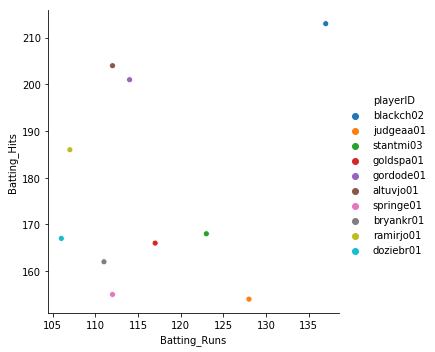

In [9]:
sns.relplot(x = "Batting_Runs", y = "Batting_Hits", hue = "playerID", data = Batting_runs); 

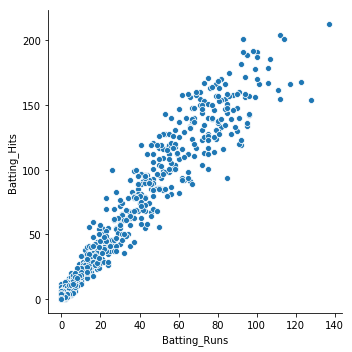

In [10]:
sns.relplot(x = "Batting_Runs", y = "Batting_Hits", data = Batting); 

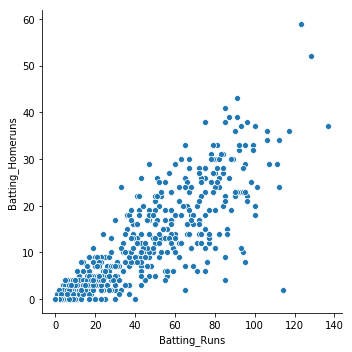

In [18]:
sns.relplot(x = "Batting_Runs", y = "Batting_Homeruns", data = Batting); 

On plotting ten players there seems to be no correlation between runs and hits but on plotting hit with runs of all the players there looks like there is a positive correlation. As runs increase the hits also increase. We declared earlier that a good player is defined by number of runs and this correlation shows us that with the increase of runs the hits also increase. Therefore, runs and hits define good players by positively affecting each other.

Even between runs and homeruns there seems to be a slight correlation although not as much as runs and hits. From this we can conclude that runs, hits and homeruns affect each other and if a player is a good batter then these numbers will be high for them. 

Pitching Table

A pitcher receives a loss when a run that is charged to him proves to be the go-ahead run in the game, giving the opposing team a lead it never gives up. Losses are almost always paired with wins when used to evaluate a pitcher, creating a separate pitching term known as win-loss record. Along with batting, we will be using pitching to evaluate a player. In pitching wins and homeruns define a good pitch. In this case we will use these two metrics to define a good player. 

In [23]:
import sqlite3 as sql
import pandas as pd

db = sql.connect("baseball.sqlite")
data = pd.read_sql("SELECT * FROM sqlite_master;", db)

'''
Pitching includes:
playerID    Player ID code
W           Wins
HR          Homeruns
'''
Pitching = pd.read_sql("""SELECT playerID, yearID, W AS 'Pitching_Wins', HR AS 'Pitching_Homeruns' 
                          FROM Pitching
                          WHERE yearID = '2017'
                          GROUP BY playerID;""", db)
Pitching.describe()

,yearID,Pitching_Wins,Pitching_Homeruns
count,755.0,755.000000,755.000000
mean,2017.0,3.034437,7.540397
std,0.0,3.906246,7.868070
min,2017.0,0.000000,0.000000
25%,2017.0,0.000000,2.000000
50%,2017.0,2.000000,5.000000
75%,2017.0,4.000000,10.000000
max,2017.0,18.000000,38.000000


In [24]:
Pitching_top = pd.read_sql("""SELECT playerID, yearID, W AS 'Pitching_Wins', HR AS 'Pitching_Homeruns' 
                              FROM Pitching
                              WHERE yearID = '2017'
                              GROUP BY playerID
                              ORDER BY Pitching_Wins DESC
                              LIMIT 10;""", db)
Pitching_top

,playerID,yearID,Pitching_Wins,Pitching_Homeruns
0,carraca01,2017,18,21
1,kershcl01,2017,18,23
2,klubeco01,2017,18,21
3,vargaja01,2017,18,27
4,bauertr01,2017,17,25
5,davieza01,2017,17,20
6,greinza01,2017,17,25
7,pomerdr01,2017,17,19
8,salech01,2017,17,24
9,santaer01,2017,16,31


These are the top ten players based on pitching wins. To see a correlation between pitching wins and homeruns I plotted them together on a relplot. There seems to be no obvious correlation but there is a slight trend of increasing homeruns to wins. 

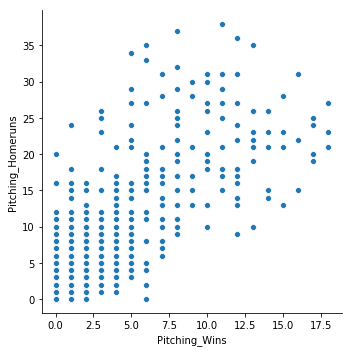

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.relplot(x = "Pitching_Wins", y = "Pitching_Homeruns", data = Pitching)

To conclude, in this question, I analyzed the metrics that define good baseball player from a pitching and batting perspective and found the players that are the best batters and pitchers based on these metrics. I also looked for a correlation between runs, hit and homeruns to see if a player who is a good runner is also a good hitter.

### Question 2 : Find the best teams? How is best defined in baseball? 

Similar to the analysis of the best players in the previous question, in this question we did an analysis of the best teams. For this analysis, we have looked at team data to see number of hits, runs and wins in the major leagues in the recent years between 2010 and 2017. 

In [4]:
import sqlite3 as sql
import pandas as pd

db = sql.connect("baseball.sqlite")
data = pd.read_sql("SELECT * FROM sqlite_master;", db)
team = pd.read_sql("SELECT * FROM Teams;", db)

'''
teamData includes:
yearID, teamID, Rank(Position in final standings), W(Wins), L(Loss), 
WSWin(World Series Winner (Y or N)), R(Runs scored), HR(Homeruns by batters)
'''
teamData = pd.read_sql("SELECT yearID, name, Rank, W, L, WSWin, R, HR FROM Teams;", db)

WinnersByRuns = pd.read_sql_query("""SELECT yearID, name AS 'Run Team', MAX(R) as 'maxNumRuns', MAX(H) as 'maxNumHits', DivWin as 'Division Winner', WCWin as 'Wild Card Winner', LgWin as 'League Champion', WSWin as 'World Series Winner' 
                                     FROM Teams 
                                     WHERE yearID BETWEEN 2010 AND 2017
                                     GROUP BY yearID
                                     ORDER BY yearID DESC 
                                     LIMIT 10
                                     """, db)

WinnersByRuns

,yearID,Run Team,maxNumRuns,maxNumHits,Division Winner,Wild Card Winner,League Champion,World Series Winner
0,2017,Houston Astros,896,1581,Y,N,Y,Y
1,2016,Boston Red Sox,878,1598,Y,N,N,N
2,2015,Detroit Tigers,891,1515,N,N,N,N
3,2014,Detroit Tigers,773,1557,Y,N,N,N
4,2013,Detroit Tigers,853,1625,Y,N,N,N
5,2012,Texas Rangers,808,1526,N,Y,N,N
6,2011,Boston Red Sox,875,1600,N,N,N,N
7,2010,Texas Rangers,859,1556,Y,N,Y,N


In this analysis, I have found the teams with the maximum runs and hits in the recent years. There again does seem to be a relation between number of runs and number of hits. We can see that by plotting them together.

Another observation that can be made  is that just because a team has high number of runs and hits does not mean that they are winners of all the leagues. There are many cases such as the 'Boston Red Sox' where a team has high runs and hits but are not winners of all the leagues. 

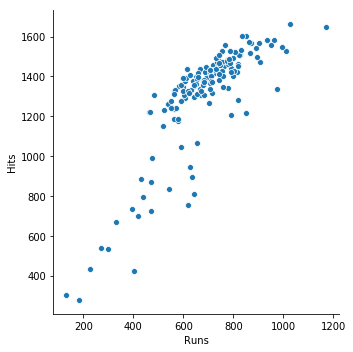

In [13]:
WinnersByRuns = pd.read_sql_query("""SELECT yearID, name AS 'Run Team', R as 'Runs', H as 'Hits', DivWin as 'Division Winner', WCWin as 'Wild Card Winner', LgWin as 'League Champion', WSWin as 'World Series Winner' 
                                     FROM Teams 
                                     GROUP BY yearID """, db)

ax = sns.relplot(x = "Runs", y = "Hits", data = WinnersByRuns)

We can see that there is a slight correlation between runs and hits on plotting the values from all the teams, this is support the fact that teams that are good runners are also good batters and positively contributes to the whole team being a good team.

In [7]:
teamAverages = pd.read_sql("""SELECT name as Team,  AVG(R) as 'Average Runs', AVG(H) as 'Average Hits', AVG(DP) AS 'Average Double Plays',
               AVG(SHO) AS 'Average Shutouts', AVG(W) AS 'Average Wins', AVG(L) AS 'Average Losses' 
               FROM Teams 
               WHERE yearID BETWEEN 2010 AND 2017 
               GROUP BY Team 
               ORDER BY Team""", db)

teamAverages

,Team,Average Runs,Average Hits,Average Double Plays,Average Shutouts,Average Wins,Average Losses
0,Arizona Diamondbacks,720.250,1420.500000,142.500000,8.125000,78.250,83.750000
1,Atlanta Braves,661.750,1374.875000,148.125000,11.375000,82.000,79.875000
2,Baltimore Orioles,710.375,1424.375000,155.750000,9.000000,81.750,80.250000
3,Boston Red Sox,790.625,1505.625000,140.125000,8.375000,85.000,77.000000
4,Chicago Cubs,685.875,1363.500000,131.750000,11.125000,79.750,82.125000
5,Chicago White Sox,678.250,1408.625000,153.750000,8.625000,76.125,85.875000
6,Cincinnati Reds,699.500,1394.625000,132.125000,10.000000,79.125,82.875000
7,Cleveland Indians,711.875,1401.000000,146.125000,10.625000,83.875,77.875000
8,Colorado Rockies,766.250,1500.250000,161.500000,7.125000,73.750,88.250000
9,Detroit Tigers,748.875,1516.250000,149.250000,8.875000,83.875,77.875000


We can use this average table to further understand what a good team metric is. 
Out of all these variables, 'Average Runs', 'Average Hits', 'Average Double Plays', 'Average Shutouts', 'Average Wins', 'Average Losses' 
we will try to see which of these variables positively correlate to a good team metric. 

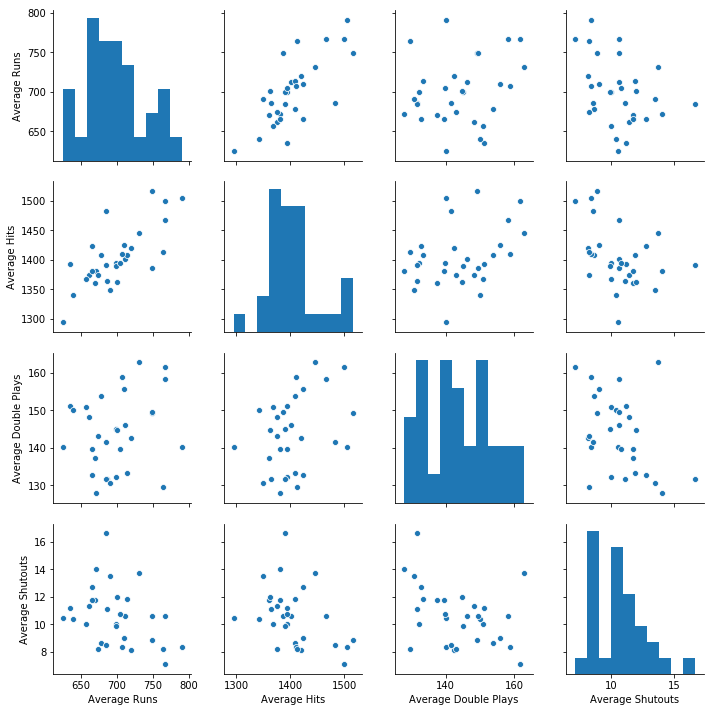

In [17]:
sns.pairplot(teamAverages, vars=["Average Runs", "Average Hits", "Average Double Plays", "Average Shutouts"])

### Question 3: How much do players who made it to the hall of fame earn? 

A little bit about Baseball Hall of Fame. 
The Hall of Fame is comprised of 329 elected members. Included are 232 former major league players, 30 executives, 35 Negro Leaguers, 22 managers and 10 umpires. The Baseball Writers’ Association of America has elected 132 candidates to the Hall while the Committees on managers, umpires, executives and long-retired players (in all of its forms) has chosen 171 deserving candidates (100 major leaguers, 30 executives, 22 managers, nine Negro Leaguers and 10 umpires).

In [35]:
db = sql.connect("baseball.sqlite")
Teams = pd.read_sql("SELECT * FROM Teams;", db)

db = sql.connect("baseball.sqlite")
data = pd.read_sql("SELECT * FROM HallOfFame;", db)

#Merging hall of fame and Salaries
result = pd.read_sql("""SELECT h.playerID, h.votes, h.category ='Player', h.yearID, s.salary
                        FROM HallOfFame AS h
                        LEFT JOIN Salaries AS s 
                        ON h.playerID = s.playerID
                        GROUP BY h.playerID
                        ORDER BY h.votes DESC
                        LIMIT 10""", db)
result

,playerID,votes,h.category ='Player',yearID,salary
0,maddugr01,555.0,1,2014,82500
1,ripkeca01,537.0,1,2007,800000
2,johnsra05,534.0,1,2015,70000
3,gwynnto01,532.0,1,2007,440000
4,glavito02,525.0,1,2014,62500
5,henderi01,511.0,1,2009,300000
6,martipe02,500.0,1,2015,119000
7,ryanno01,491.0,1,1999,1000000
8,brettge01,488.0,1,1999,1000000
9,thomafr04,478.0,1,2014,120000


Text(0, 0.5, 'Salary')

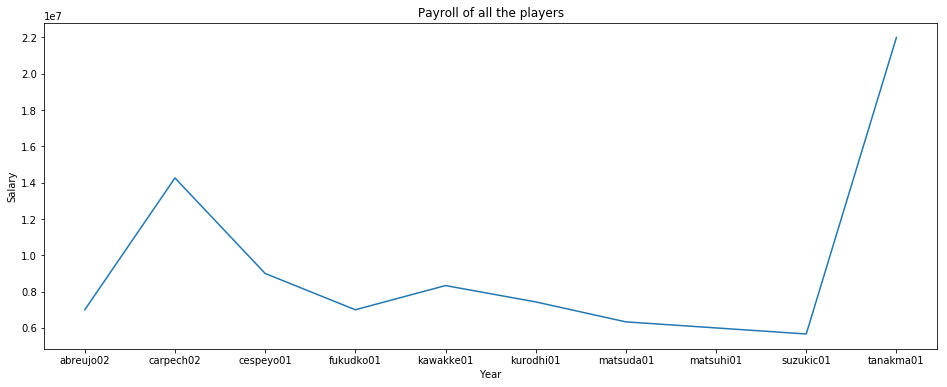

In [39]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot("playerID", "salary", data = result)
ax.set_title("Payroll of all the Top ten players in Hall of Fame")
ax.set_xlabel("Year")
ax.set_ylabel("Salary")

From this query and plot we can see that Hall Of Fame players earn a high salary of 1000000 and a low of 62500.

In [38]:
result = pd.read_sql("""SELECT playerID, salary
                        FROM Salaries 
                        GROUP BY playerID
                        ORDER BY salary DESC
                        LIMIT 10""", db)
result

,playerID,salary
0,tanakma01,22000000
1,carpech02,14259403
2,cespeyo01,9000000
3,kawakke01,8333666
4,kurodhi01,7433333
5,abreujo02,7000000
6,fukudko01,7000000
7,matsuda01,6333333
8,matsuhi01,6000000
9,suzukic01,5666667


Text(0, 0.5, 'Salary')

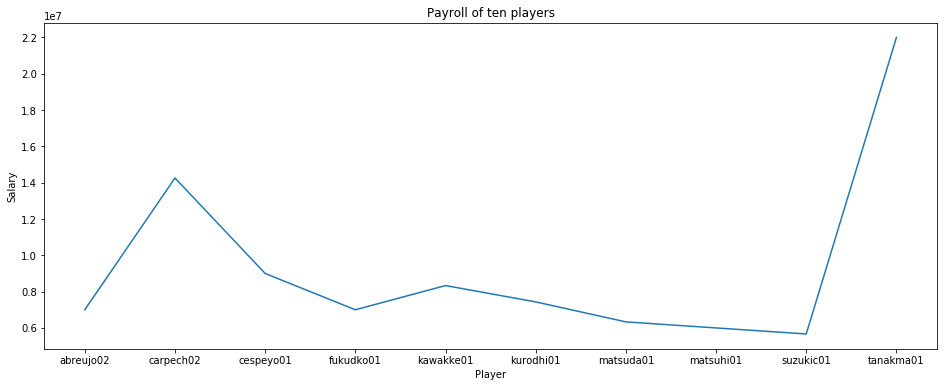

In [40]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot("playerID", "salary", data = result)
ax.set_title("Payroll of ten players")
ax.set_xlabel("Player")
ax.set_ylabel("Salary")

Compared to the table that showed up the people with the most votes from the hall of fame table which was 1000000, the other table with the salary ordered in a descending order shows that the highest paid player earned 22000000. This shows that the Hall of Fame players do not always earn the most.  